# <font size="+3"><b><u>Project Name : <font size="+3" color='#DE3163'><b><u> Mall Customer Segmentation </u>

![Netflix movies and tv shows clustering](https://www.shutterstock.com/image-illustration/large-group-people-seen-above-600w-263091443.jpg)

##**Problem description**

Customer segmentation is a separation of a market into multiple distinct groups of consumers who share similar characteristics. Segmentation of the market is an effective way to define and meet customer needs.

 Market Basket Analysis is carried out to predict the target customers who can be easily converged, among all the customers. In order to allow the marketing team to plan the strategy to market the new products to the target customers which are similar to their interests, we can use unsupervised machine learning techniques like K-Means Clustering Algorithm, Minibatch K-Means and Hierarchical Clustering etc.


 Benefits of customer segmentation include:

1) Personalisation:

  Personalisation ensures that you provide exceptional customer experience.

2) Customer Retention

It is 16 times as costly to build a long-term business relationship with a new customer than simply to cultivate the loyalty of an existing customer.

3) Better ROI for marketing:

Affirmations that right marketing messages are sent to the right people based on their life cycle stage.
Reveal new opportunities


Customer segmentation may reveal new trends about products and it may even give the first mover’s advantage in a product segment.


###**AIM**

The aim of a mall customer segmentation project is to gain a deeper understanding of the mall's customer base and to categorize customers into distinct segments based on their characteristics, behaviors, preferences, or demographics using dataset available to us.

###**Dataset Description -**


The sample Dataset summarizes the usage behavior of about 200 active customers during the last 3 months. The file is at a customer level with 5 behavioral variables.

####**Attribute Information :**

**1. CustomerID :** Unique id assigned to each customer.

**2. Gender :** Gender of customer

**3. Age :** Age of customer

**4. Annual Income (k$) :** Annual income of customer

**5. Spending Score (1-100) :** Score assigned by the mall based on customer behavior and spending nature


## **Importing libraries and packages**

In [ ]:
# For data manupulation
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Statistical analysis and probability calculations
from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import make_pipeline
#Scaling
from sklearn.preprocessing import RobustScaler

# clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# To ignore irrelevent warnigns
import warnings
warnings.filterwarnings('ignore')

# Plot setting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# For Printing
from IPython.display import display


## <font size="+2.5" color='#144c5c'><b>  <u>Exploratory data analysis</u>

### Lets understand the Data

In [ ]:
# Load the data
# Set up the url
URL = 'https://drive.google.com/file/d/1v7xYjpCvRwyz1DyNT4xAM4sfR-lAH9Ij/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

# Lets view the overall data
df = pd.read_csv(path,encoding= 'unicode_escape')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check the shape of data
df.shape

(200, 5)

In [ ]:
# Get the basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# print all columns of data
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Let's get the descriptive statistics of data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Let's check unique value in each column
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
Categorical_column= ['Gender','CustomerID']
Numerical_column=['Age','Annual Income (k$)','Spending Score (1-100)' ]

**Conclusion:**

- There are 200 rows and 5 columns in the dataset.
- Customer ID , Age , Annual income and spending score are numerical columns.Gender is categorical columns.
- The data has no null values.
- Memory usage by dataset : 7.9+ KB
- There are 4 integer and 1 object type feature present.
- There are 200 unique Customer ID, 51 unique age groups , 64 unique Annual income and 84 unique spending score.


### Lets clean the Data

In [ ]:
# Get the Percentage of the missing values in each column
100*df.isna().sum()/len(df)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

It shows that there are no missing values in the dataset.

In [ ]:
# Checking the number of the duplicate value in the dataset
df.duplicated().sum()

0

There are no duplicate values in the dataset.

###Finding the insights, patterns and relations

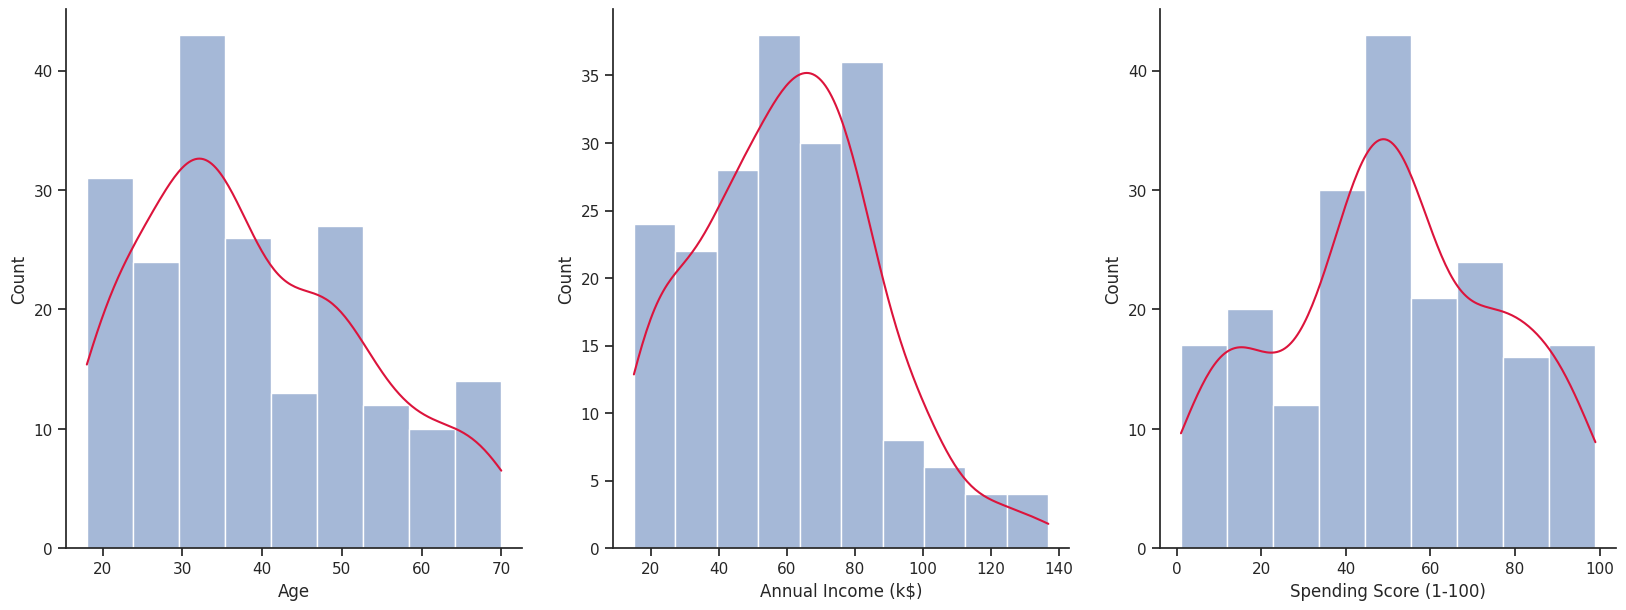

In [ ]:
f, axes = plt.subplots(2,2 , figsize=(20, 7), sharex=False)
pos = 1
for i, feature in enumerate(Numerical_column[:3]):

  plt.subplot(1 , 3 , pos)
  ax = sns.histplot(data=df, x = feature,kde=True,palette="husl") # ax=axes[i%2, i//2]
  ax.lines[0].set_color('crimson')
  pos = pos + 1

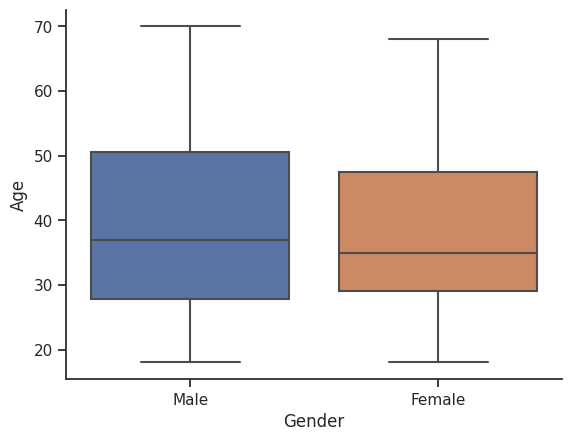

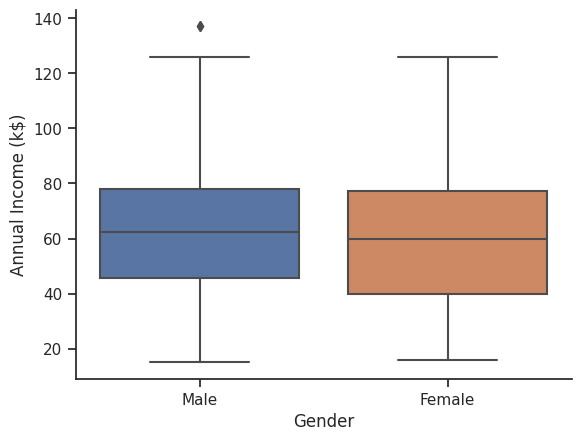

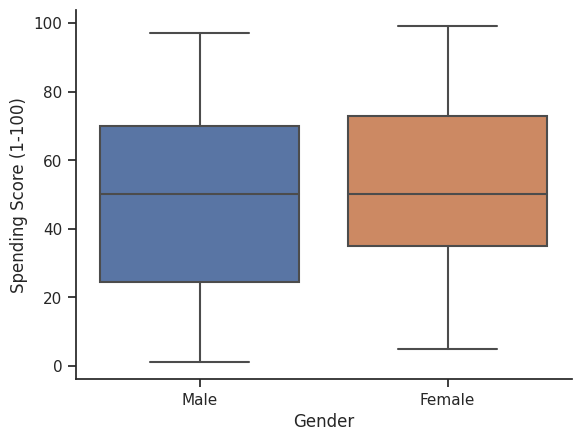

In [ ]:
#Let's also chevk box plot for Numerical columns
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

**Conclusion:**

- Most of the people lie in age group of 30-40 in given dataset.
- Most frequent annual income lies in between 60 - 80 thousand dollar.
- Most of the people have spending score between 40-60.

In [ ]:
# get the features except object types
numeric_feats = df.dtypes[df.dtypes != 'object'].index

# check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(10))


 Skew in numberical features: 

                            Skew
Age                     0.481919
Annual Income (k$)      0.319424
CustomerID              0.000000
Spending Score (1-100) -0.046865


Our data is not much skewed.

####Let's plot pie chart for categorical column i.e for Gender column

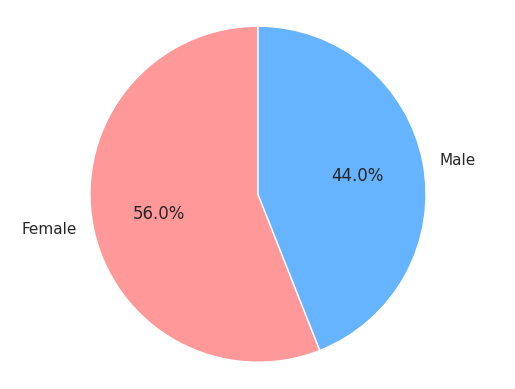

In [ ]:
# Pie chart
labels = ['Female','Male']
values = df['Gender'].value_counts()/200*100
colors = ['#ff9999', '#66b3ff']

# Plotting the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Aspect ratio of the pie chart to make it a circle
plt.axis('equal')

# Displaying the chart
plt.show()


It clearly shows that there are more females in our dataset as compared to Males.

####Let's see how gender of customers affects to all other features.

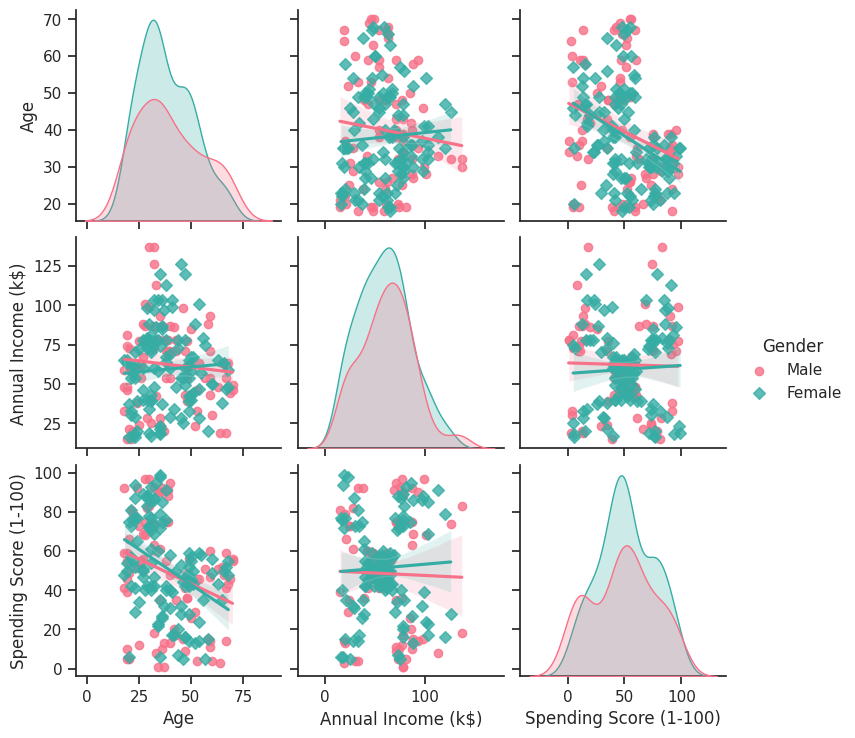

In [ ]:
#Pairplot
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

From the above pairplot we observe that green colour has higher ratio than pink colour as there are more female customers than male.

####Let's check correlation between various columns

<Axes: >

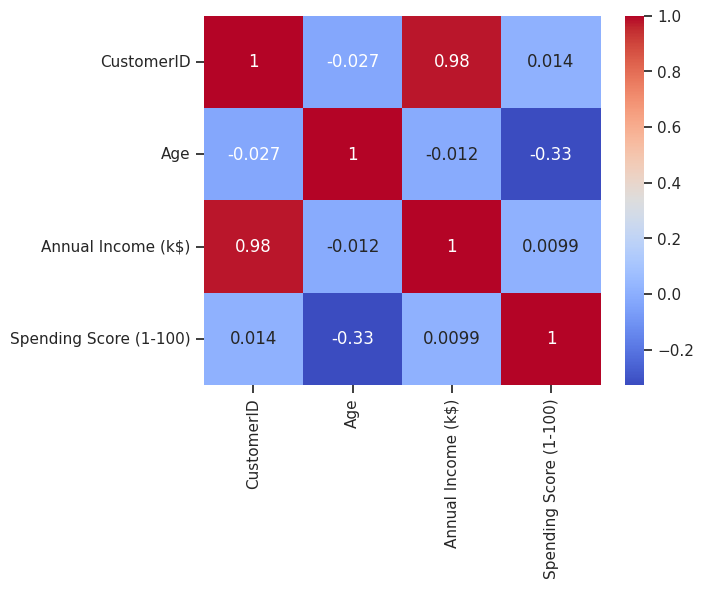

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Above plot shows:

- Their is negative correlation between age and spending score. It's not a strong association, but older the person, the worse their spending score.

- Customer ID is highly correlated with Annual income.

##**Feature Engineering**

####Dropping redundant columns

In [ ]:
df.drop(columns='CustomerID',axis=1,inplace=True)
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


####Encoding Categorical Features

As we have only one categorical feature here i.e Gender, let's encode it.

In [ ]:
# Encoding 'Gender' column : 0 for M and 1 for F.

label_enc = {'Male': 0 , 'Female':1 }

df['Gender'] = df['Gender'].replace(label_enc)


df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


##**Applying Clustering Algorithms**

Let's apply various algorithm and check which algorithm is best for our dataset. We will be applying following algorithm:
- Kmeans Clustering
- Agglomerative Clustering
- GaussianMixture Model based clustering
- DBSCAN Clustering

###Hyperparameter tuning

To find best K value there are many techniques that we can use.
 Some of them are:

 1) **Elbow Method**:The elbow method is a popular technique for determining the optimal number of clusters, K, in K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the "elbow" point, which represents the value of K where the rate of improvement in clustering performance starts to diminish.

 2) **Average silhouette method:**The average silhouette method is another technique for determining the optimal number of clusters, K, in clustering algorithms. It evaluates the quality of clustering by measuring how well each data point fits within its assigned cluster compared to other clusters. The average silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.



Here we'll use Elbow Method to find the best K Value.



###Elbow Method

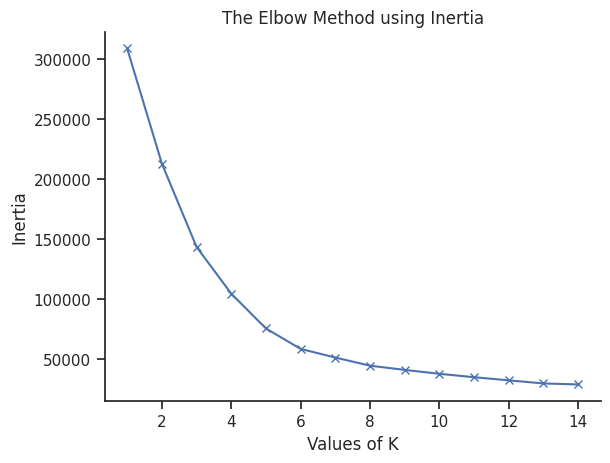

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the above elbow method we see that K = 5 is the best K value for our clustering

###K-Means Clustering

In [ ]:
# apply kmeans algorithm
kmeans_model=KMeans(5)
kmeans_clusters = kmeans_model.fit_predict(df)

###Agglomerative Clustering

In [ ]:
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(df)

###GaussianMixture Model based clustering

In [ ]:
GaussianMixture_model = GaussianMixture(n_components=5)
gmm_clusters = GaussianMixture_model.fit_predict(df)

###DBSCAN Clustering

In [ ]:
model_dbscan = DBSCAN(eps=3, min_samples=17)
dbscan_clusters = model_dbscan.fit_predict(df)

Cluster Validity Indices

To compare which clustering algorithm is best for our model, we use various cluster validity indices.

1) Dunn Index

2) Davies Bouldin Index

3) Silhouette Score

4) Calinski - Harabasz Index


Here we'll use silhouette score method to choose the best clustering algorithm

In [ ]:
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(df,' : KMeans',kmeans_clusters)
silhouette_method(df,' : Agglomerative',agglomerative_clusters)
silhouette_method(df,' : GaussianMixture',gmm_clusters)
print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.4402372958247734
Clustering   : Agglomerative  : silhouette score :  0.43997527212476695
Clustering   : GaussianMixture  : silhouette score :  0.43413875007151853


Here , it's clearly visible that silhouette score for kmeans is highest.So , we will aply kmeans algorithm.

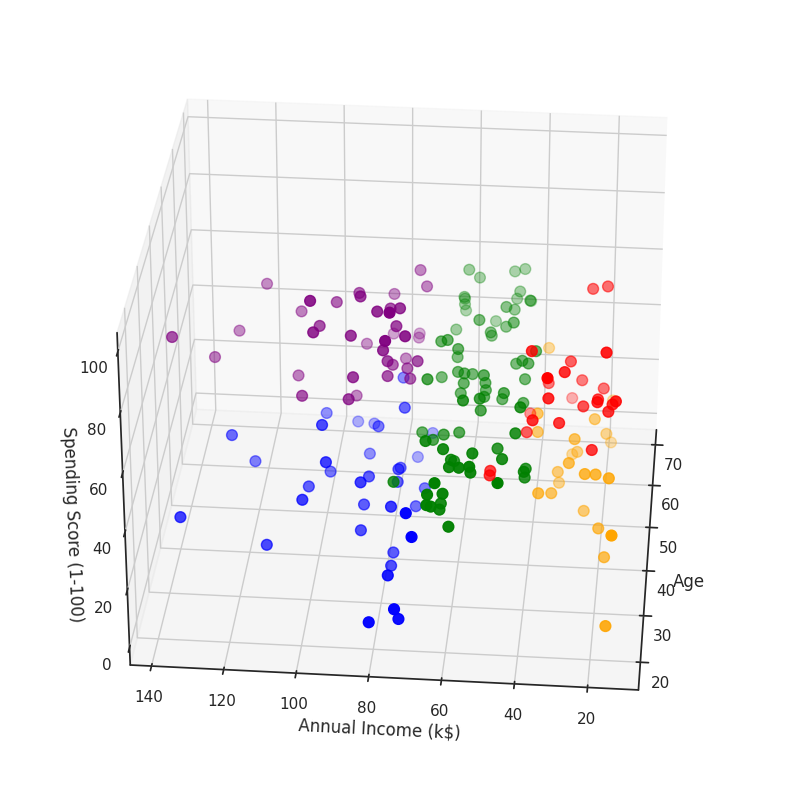

In [ ]:
df["label"] = kmeans_clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0],df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
